In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"Data_file.csv")
data.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


Import data CSV file help of READ_CSV method from PC. We have data to find Micro Credit Loan Defaulter and as we are getting info from data it is a Cetagorical data.

# Exploratory Data Analysis EDA

In [3]:
data.shape

(209593, 37)

There are 209593 rows and 37 columms.

In [4]:
data.drop('msisdn',axis=1, inplace=True)

We drop column “msisdn” it is not related with data and it is just a mobile number.


In [5]:
data.drop('Unnamed: 0',axis=1,inplace=True)

We drop column “Unnamed” because it is a serial no. only for check serial number of all rows and no relation with actual data.

In [6]:
data['pcircle'].unique()

array(['UPW'], dtype=object)

check identical value in Pcircle column.

In [7]:
data.drop('pcircle',axis=1, inplace=True)

with the help of above mentioned command we are getting it has only single value, thats way we can droping.

In [8]:
data['pdate'] = pd.to_datetime(data['pdate'])
data['Year'] = data['pdate'].dt.year

In [9]:
data['month'] = data['pdate'].dt.month

In [10]:
data['day'] = data['pdate'].dt.day

"pdate" column is date column and we are converting into YY/MM/DD format.

In [11]:
data.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate,Year,month,day
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,2.0,12,6,0.0,29.000000,29.000000,2016-07-20,2016,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,1.0,12,12,0.0,0.000000,0.000000,2016-08-10,2016,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,1.0,6,6,0.0,0.000000,0.000000,2016-08-19,2016,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,2.0,12,6,0.0,0.000000,0.000000,2016-06-06,2016,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,7.0,42,6,0.0,2.333333,2.333333,2016-06-22,2016,6,22


pdate column converted.

In [12]:
data.drop('pdate',axis=1, inplace=True)

After converting and serprating the pdate column there is no need pdate column as we already seprated year,month,day columns.

In [13]:
data['month'].unique()

array([7, 8, 6], dtype=int64)

checking identical value in month column.

In [14]:
data['day'].unique()

array([20, 10, 19,  6, 22,  2,  5, 15,  8, 12, 29, 16,  3, 24,  4,  1, 26,
       23,  9,  7, 27, 11, 30, 14, 21, 25, 28, 18, 13, 17, 31],
      dtype=int64)

checking identical value in day column.

In [15]:
data.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
Year                    0
month                   0
day                     0
dtype: int64

There are no missing value present in our data.

<AxesSubplot:>

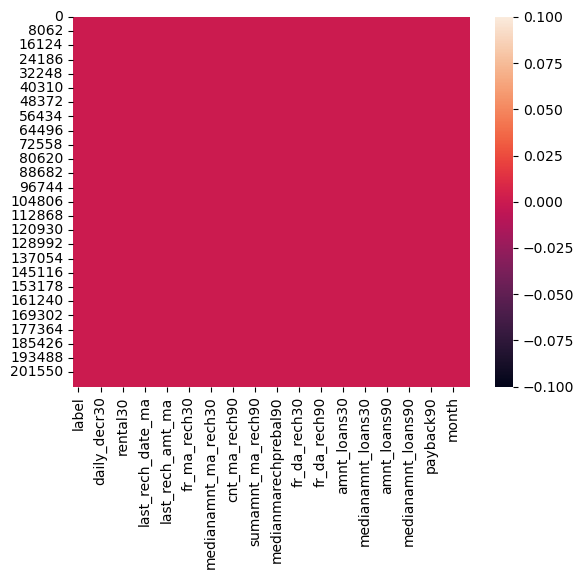

In [16]:
import seaborn as sns
sns.heatmap(data.isnull())

Checking missing value with the help of heatmap and again no missing value is present.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   daily_decr90          209593 non-null  float64
 4   rental30              209593 non-null  float64
 5   rental90              209593 non-null  float64
 6   last_rech_date_ma     209593 non-null  float64
 7   last_rech_date_da     209593 non-null  float64
 8   last_rech_amt_ma      209593 non-null  int64  
 9   cnt_ma_rech30         209593 non-null  int64  
 10  fr_ma_rech30          209593 non-null  float64
 11  sumamnt_ma_rech30     209593 non-null  float64
 12  medianamnt_ma_rech30  209593 non-null  float64
 13  medianmarechprebal30  209593 non-null  float64
 14  cnt_ma_rech90         209593 non-null  int64  
 15  

With help of df.info() we can get information about data for example: Columns Name, Number of rows and data type like as Object, int, float and as we are getting there are no object type column.

# Summary Statistics

In [18]:
data.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Year,month,day
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.0,209593.000000,209593.00000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,2016.0,6.797321,14.39894
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,0.0,0.741435,8.43890
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.0,6.000000,1.00000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,2016.0,6.000000,7.00000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,2016.0,7.000000,14.00000
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,2016.0,7.000000,21.00000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,2016.0,8.000000,31.00000


Statistical Summary provide information about whole data statistically i.e. Count, Mean, Standard Deviation, Minimum value, 25%, 50% 75% and Maximum Value and statistical report is mentioned above.

# Data Visualization

# Correlation

<AxesSubplot:>

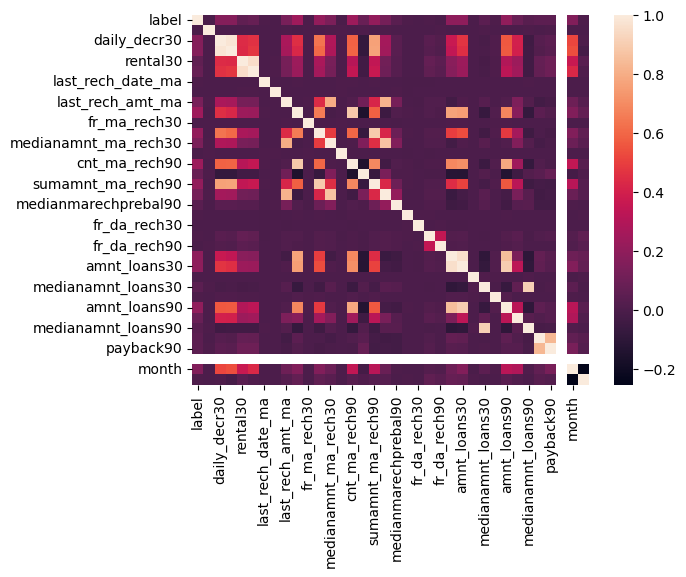

In [19]:
datacor=data.corr()
datacor
sns.heatmap(datacor)

With the help of correlation, we can find relation between variables and we are getting there are some columns have good relation and few one is not good correlated with each other.

<AxesSubplot:>

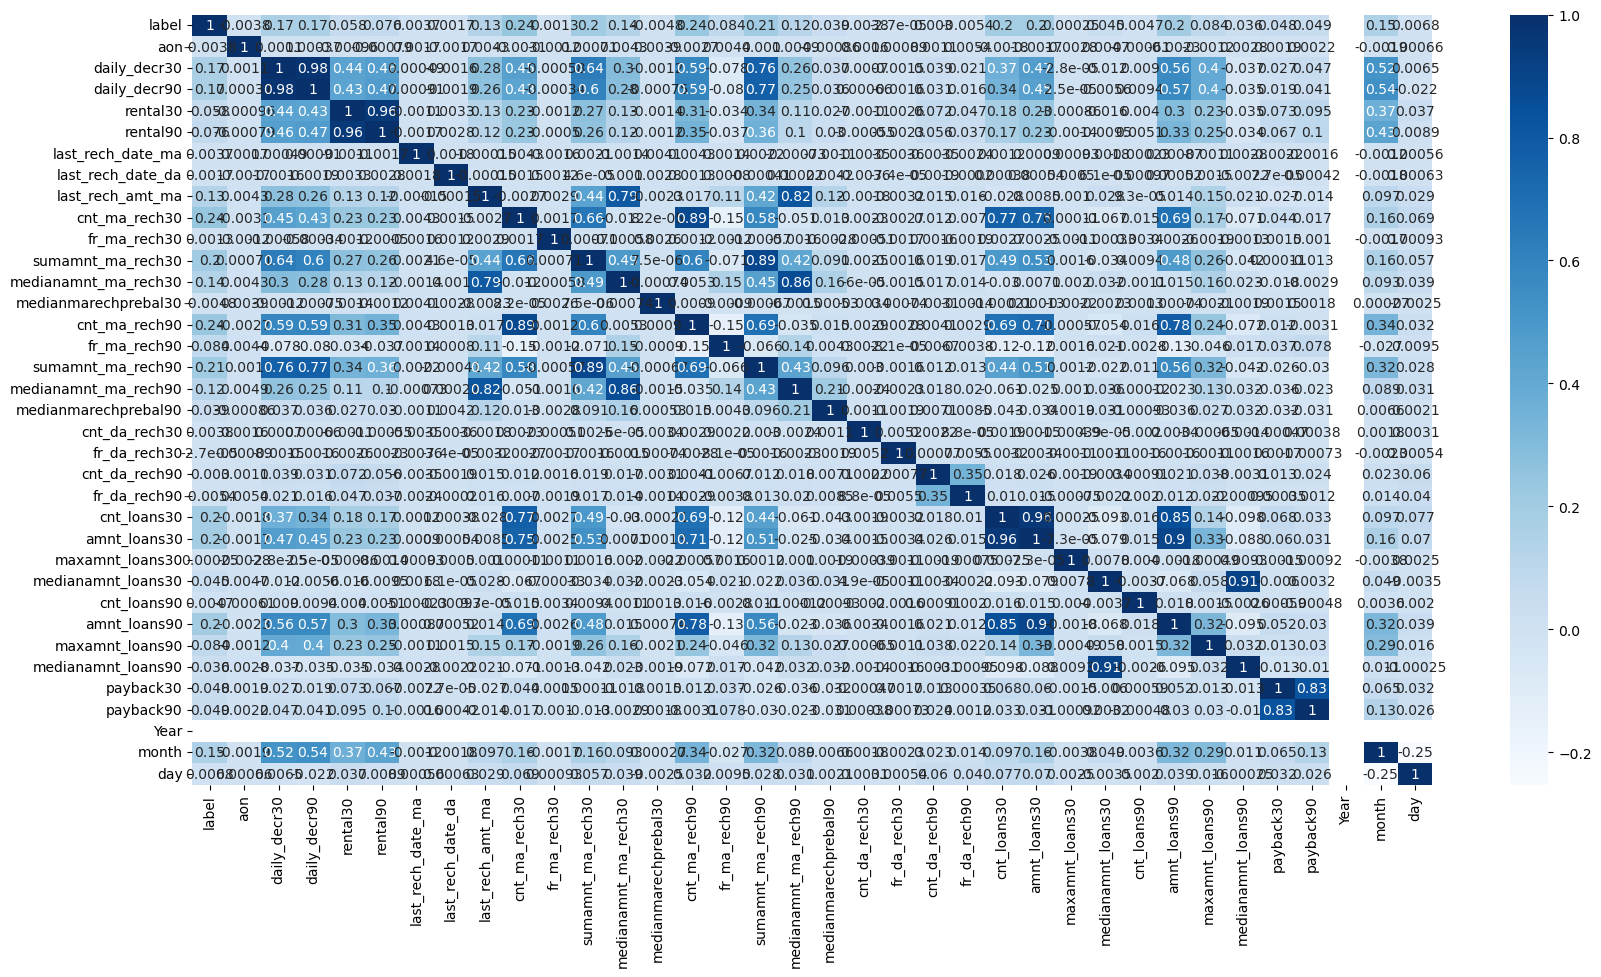

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(datacor,cmap='Blues',annot=True)

# Univariate Analysis

# Ploting Outliers by Box Plot

<AxesSubplot:>

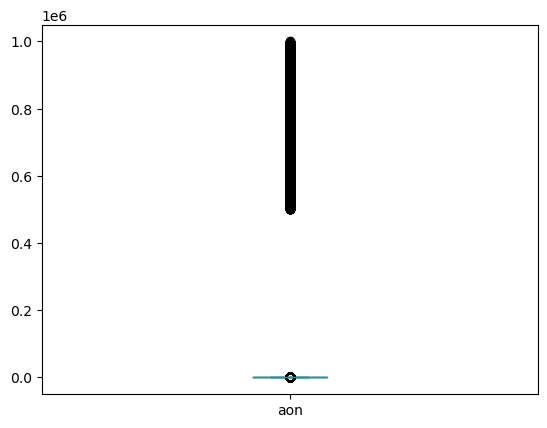

In [21]:
data['aon'].plot.box()

Outliers are present in "aon" coulmn.

<AxesSubplot:>

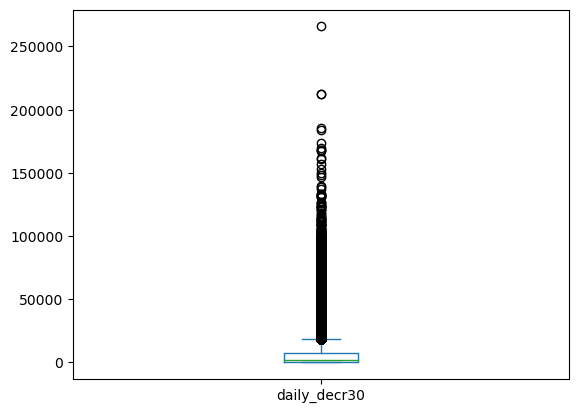

In [22]:
data['daily_decr30'].plot.box()

Outliers are present in "daily_decr30" column.

<AxesSubplot:>

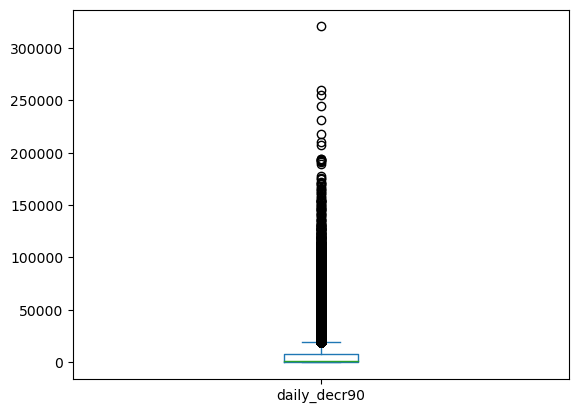

In [23]:
data['daily_decr90'].plot.box()

Outliers are present in daily_decr90 column.

<AxesSubplot:>

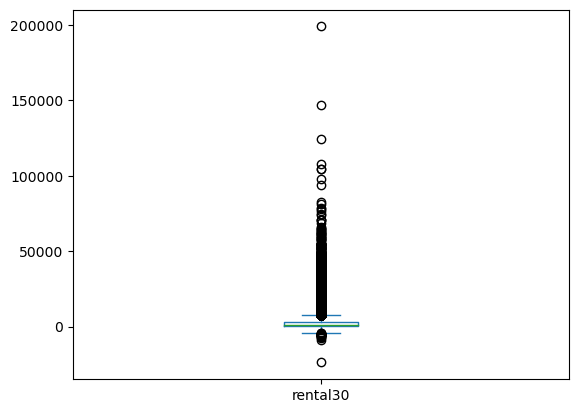

In [24]:
data['rental30'].plot.box()

Outliers are present in rental30 column.

<AxesSubplot:>

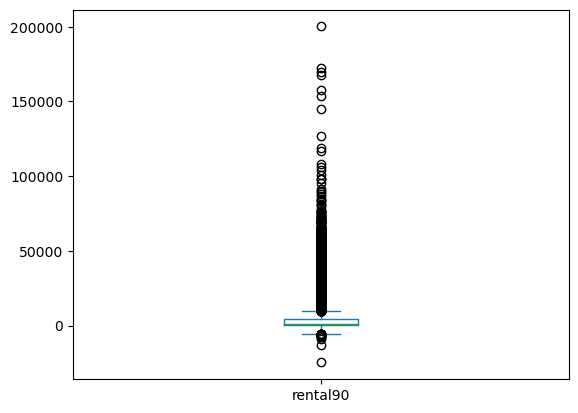

In [25]:
data['rental90'].plot.box()

Outliers are present in rental90 column.

<AxesSubplot:>

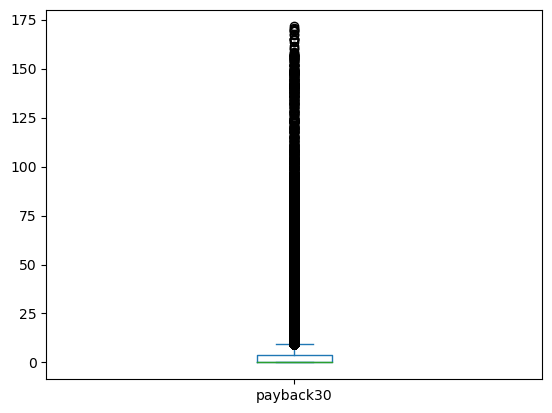

In [26]:
data['payback30'].plot.box()

Outliers are present in payback30 column.

<AxesSubplot:>

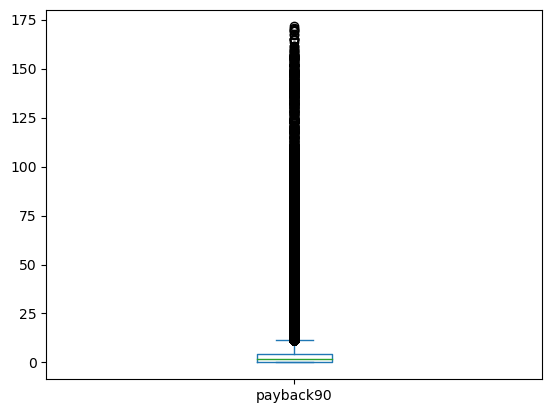

In [27]:
data['payback90'].plot.box()

Outliers are present in payback90 column.

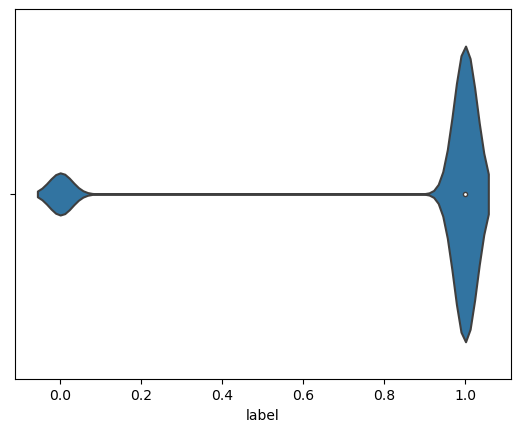

In [28]:
sns.violinplot(x='label',data=data)
plt.show()

Maximum data is 1 and some data are 0 there are two value is target.

{'bodies': [<matplotlib.collections.PolyCollection at 0x23154d71ac0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x23154d71a30>,
 'cmins': <matplotlib.collections.LineCollection at 0x23154d821c0>,
 'cbars': <matplotlib.collections.LineCollection at 0x23154d82580>}

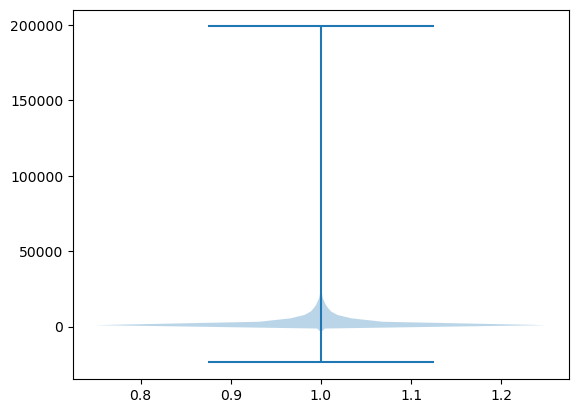

In [29]:
plt.violinplot(data['rental30'])

rental30 column with the help of violinplot.

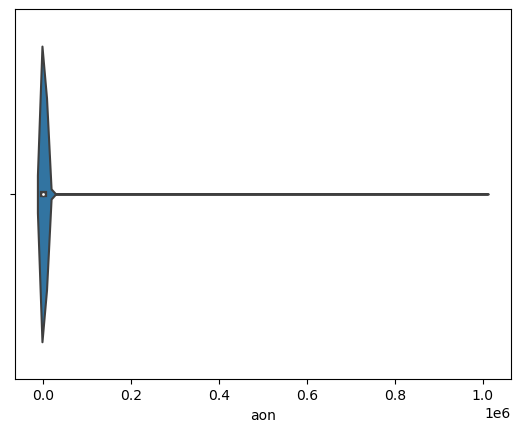

In [30]:
import matplotlib.pyplot as plt
sns.violinplot(x='aon',data=data)
plt.show()

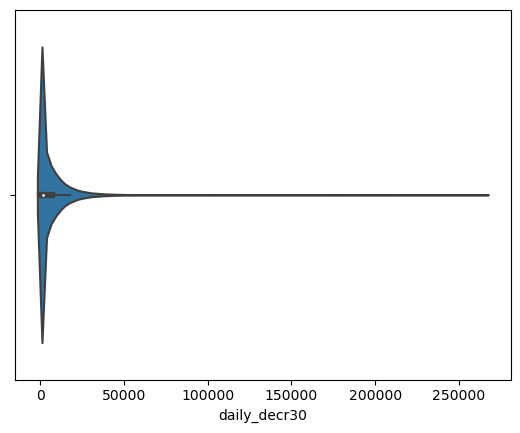

In [31]:
sns.violinplot(x='daily_decr30',data=data)
plt.show()

daily_decr30 column with the help of violinplot.

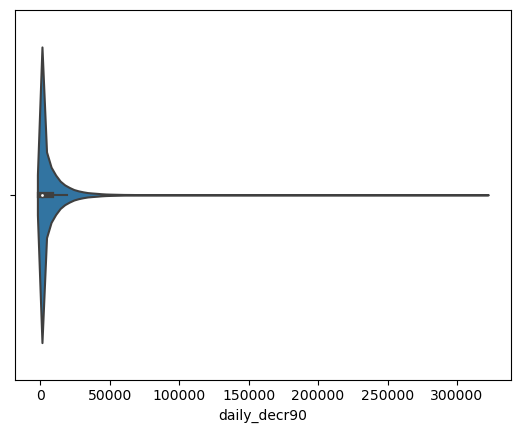

In [32]:
sns.violinplot(x='daily_decr90',data=data)
plt.show()

daily_decr90 column with the help of violinplot.

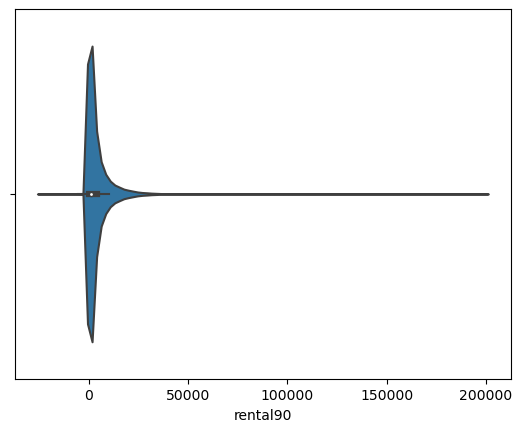

In [33]:
sns.violinplot(x='rental90',data=data)
plt.show()

Rental90 column wiht the help of violinplot. 

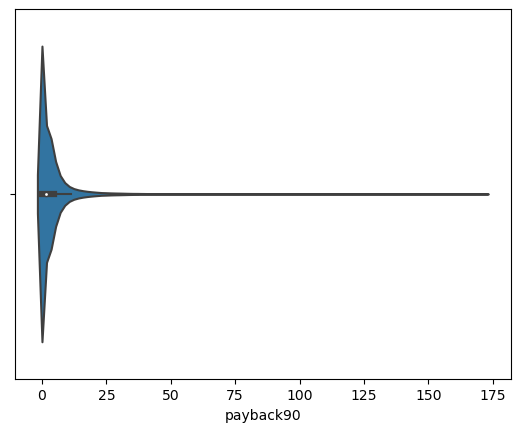

In [34]:
sns.violinplot(x='payback90',data=data)
plt.show()

payback90 collumn with the help of violinplot.

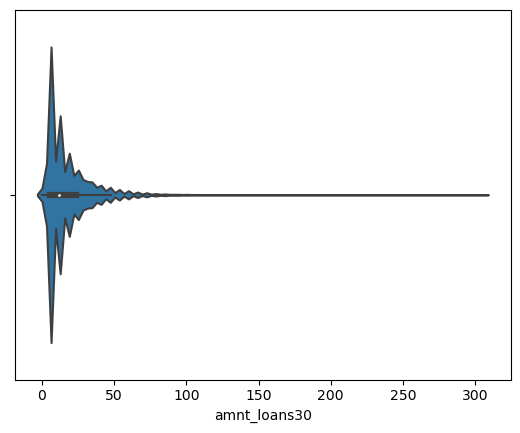

In [35]:
sns.violinplot(x='amnt_loans30',data=data)
plt.show()

amnt_loan30 column with the help of violinplot.

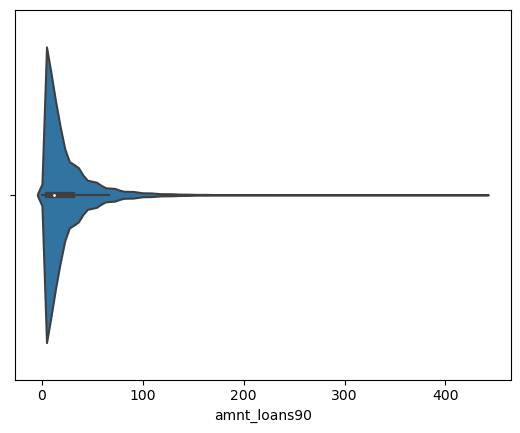

In [36]:
sns.violinplot(x='amnt_loans90',data=data)
plt.show()

amnt_loans90 column with the help of violinplot.

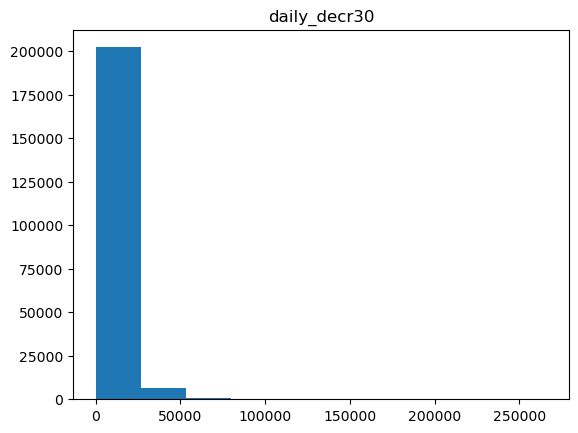

In [37]:
plt.hist(data['daily_decr30'],bins=10)
plt.title('daily_decr30')
plt.show()

Daily_decr30 column with the help of Histogram.

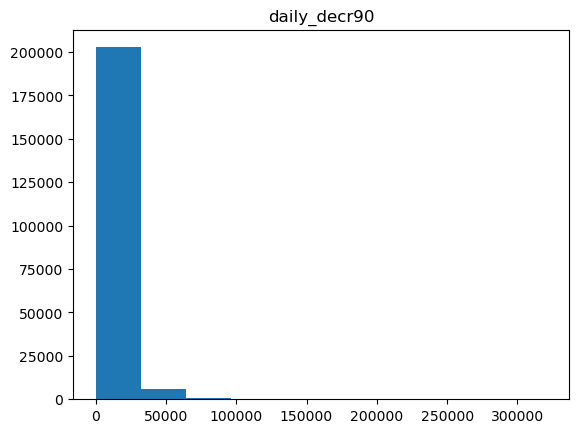

In [38]:
plt.hist(data['daily_decr90'],bins=10)
plt.title('daily_decr90')
plt.show()

Daily_decr90 column with the help of Histogram.

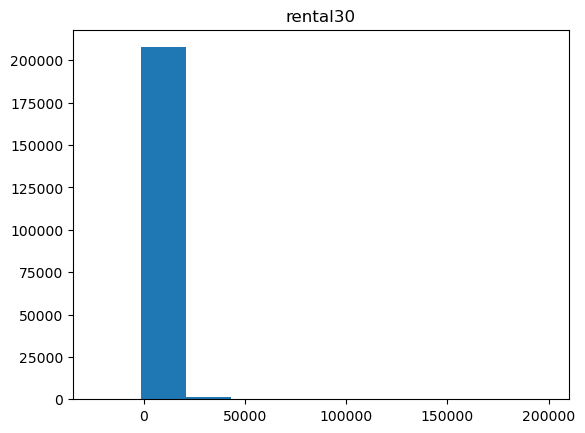

In [39]:
plt.hist(data['rental30'],bins=10)
plt.title('rental30')
plt.show()

rental30 column with the help of Histogram.

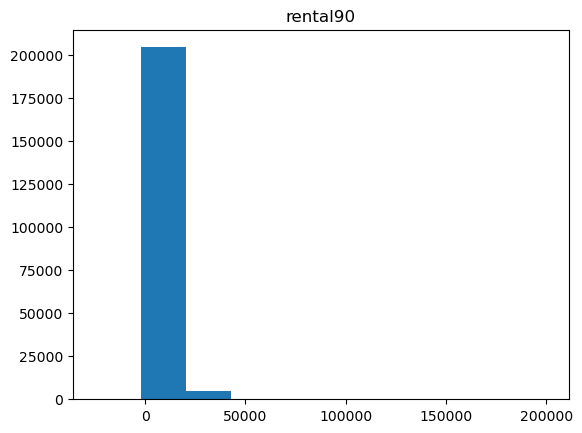

In [40]:
plt.hist(data['rental90'],bins=10)
plt.title('rental90')
plt.show()

rental90 column with the help of Histogram.

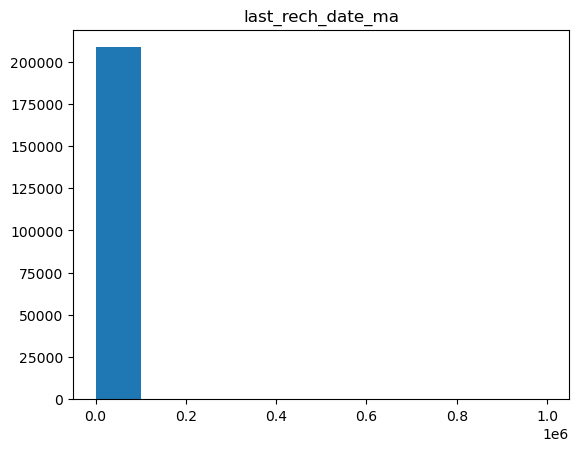

In [41]:
plt.hist(data['last_rech_date_ma'],bins=10)
plt.title('last_rech_date_ma')
plt.show()

last_rech_date_ma column with the help of Histogram.

In [42]:
data.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'Year', 'month', 'day'],
      dtype='object')

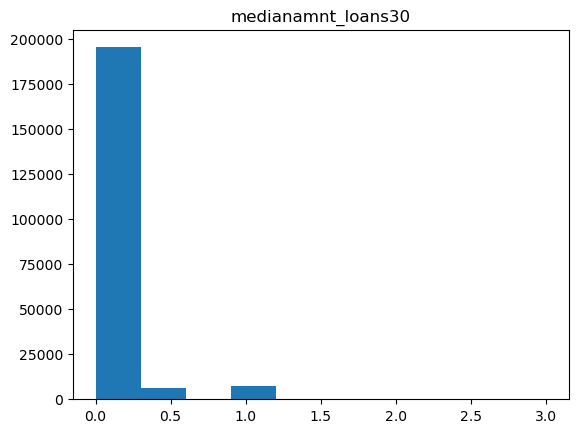

In [43]:
plt.hist(data['medianamnt_loans30'],bins=10)
plt.title('medianamnt_loans30')
plt.show()

medianamnt_loans30 column with the help of Histogram.

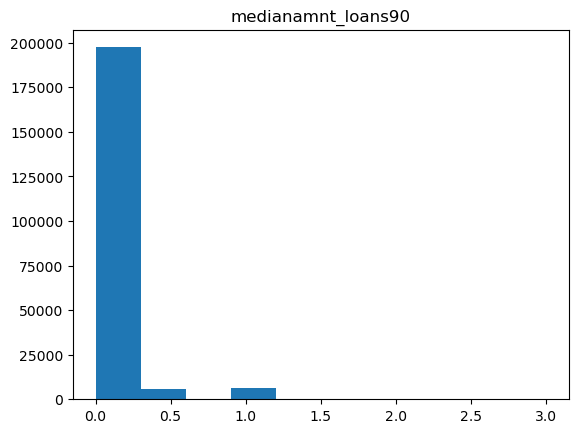

In [44]:
plt.hist(data['medianamnt_loans90'],bins=10)
plt.title('medianamnt_loans90')
plt.show()

medianamnt_loans90 column with the help of Histogram.

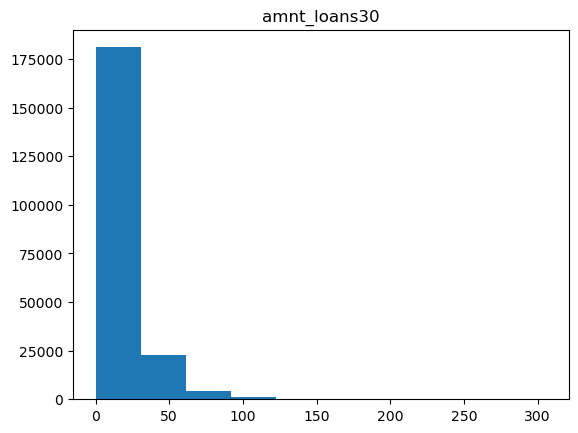

In [45]:
plt.hist(data['amnt_loans30'],bins=10)
plt.title('amnt_loans30')
plt.show()

amnt_loans30 column with the help of Histogram.

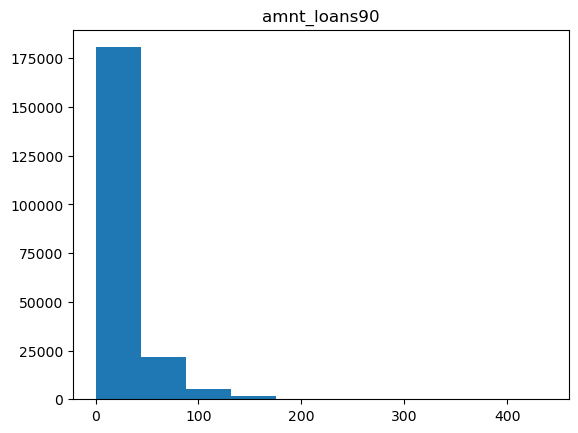

In [46]:
plt.hist(data['amnt_loans90'],bins=10)
plt.title('amnt_loans90')
plt.show()

amnt_loans90 column with the help of Histogram.

# Bivariate Analysis

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


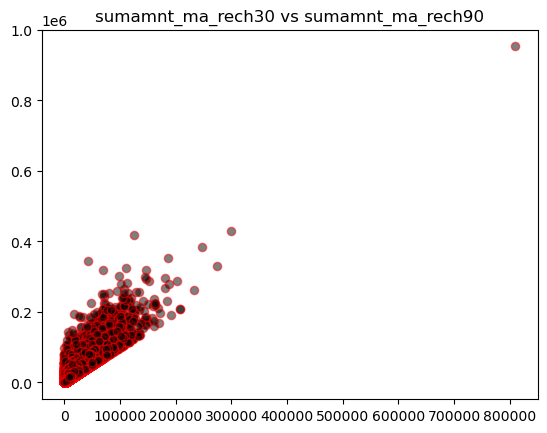

In [47]:
plt.scatter(data['sumamnt_ma_rech30'],data['sumamnt_ma_rech90'],alpha=0.5,c=(0,0,0),edgecolors='r')
plt.title('sumamnt_ma_rech30 vs sumamnt_ma_rech90')
plt.show()

with the help of scatterplot we are checking how much data are spreading.

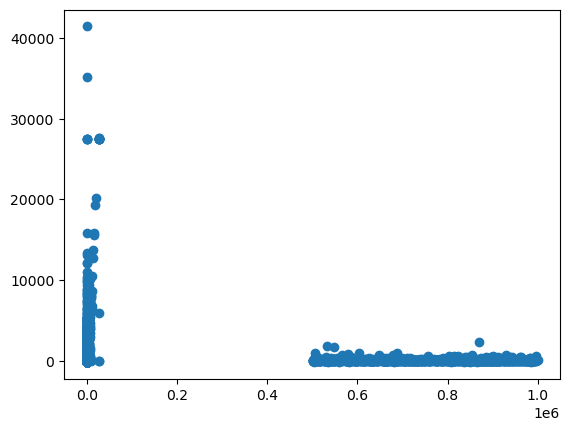

In [48]:
x=data['medianmarechprebal30']
y=data['medianmarechprebal90']
plt.scatter(x,y)
plt.show()

In above scatterplot two columns are not correlated with each as we are getting.

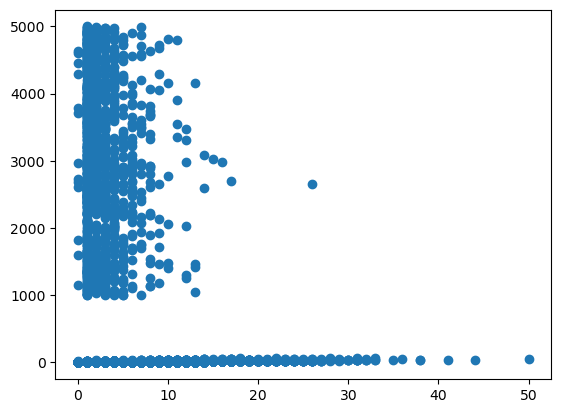

In [49]:
x=data['cnt_loans30']
y=data['cnt_loans90']
plt.scatter(x,y)
plt.show()

With the help of scatterplot checking correlation with two columns 'cnt_loans30' and 'cnt_loans90'.

# Multivariate Analysis

In [50]:
collist=data.columns.values
ncol=33
nrows=10

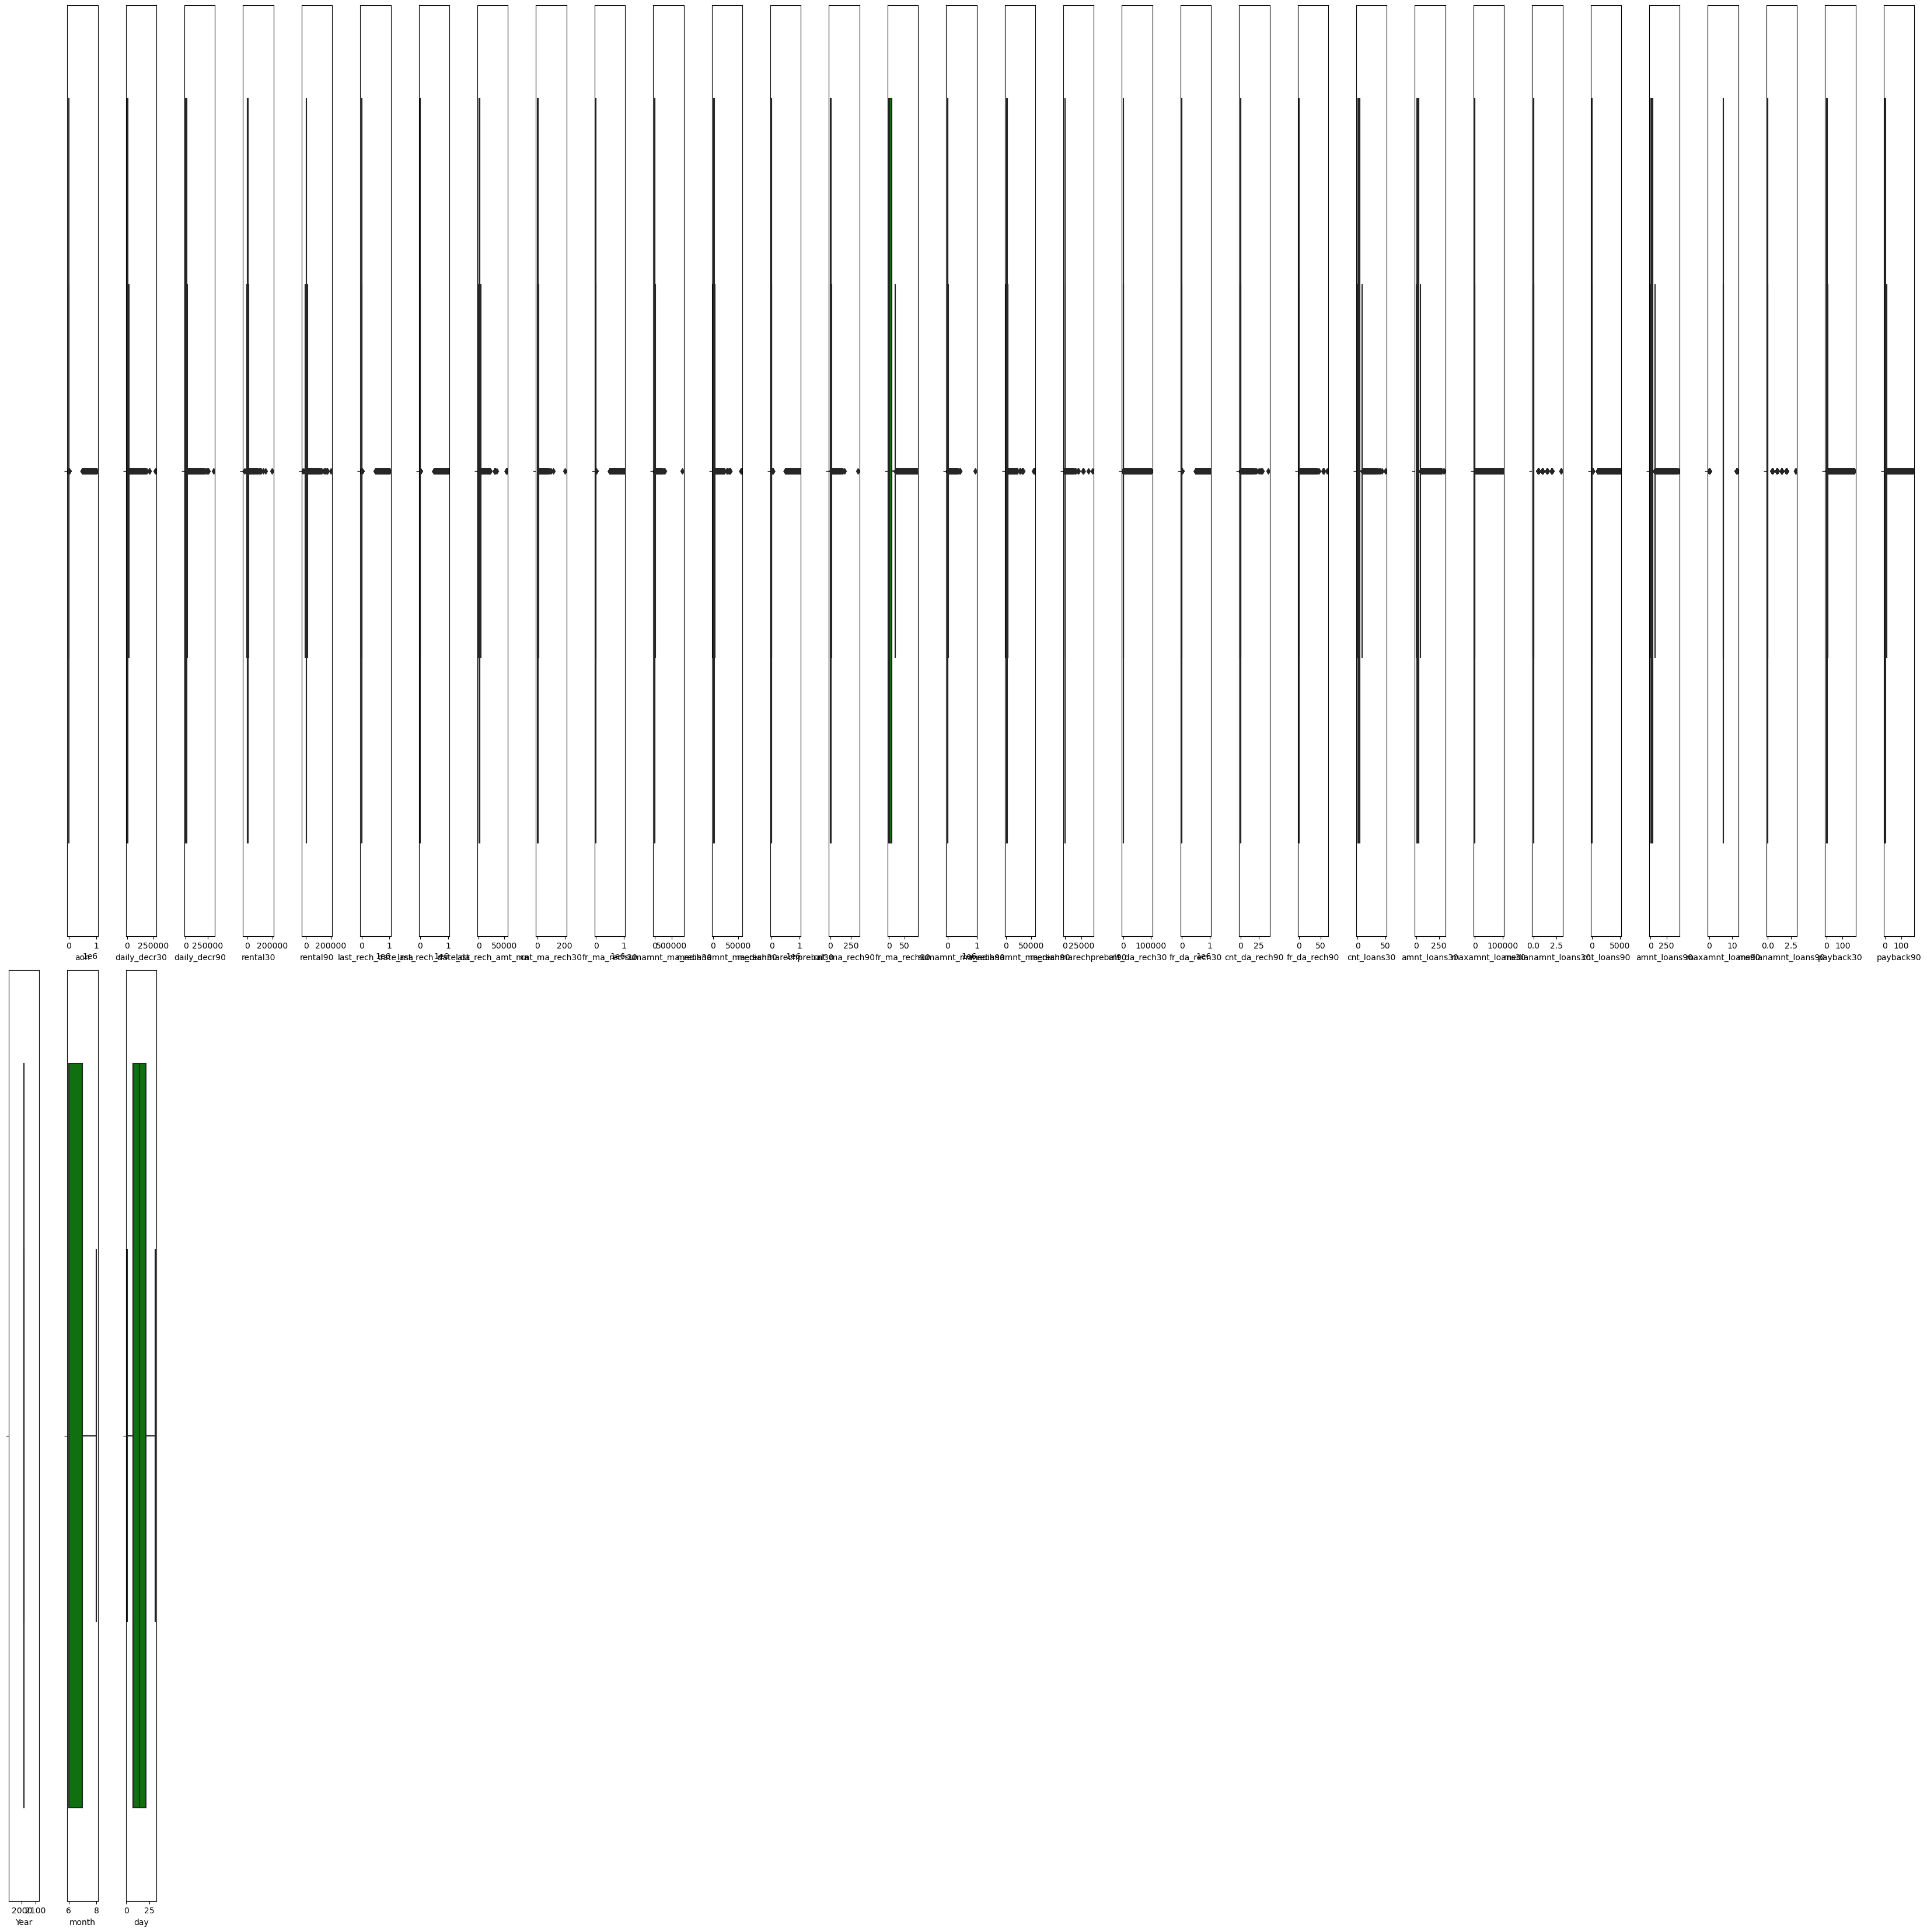

In [51]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data[collist[i]],color='green', orient='v')
    plt.tight_layout()

Ploting all columns by Boxplot to find outliers in a one place.

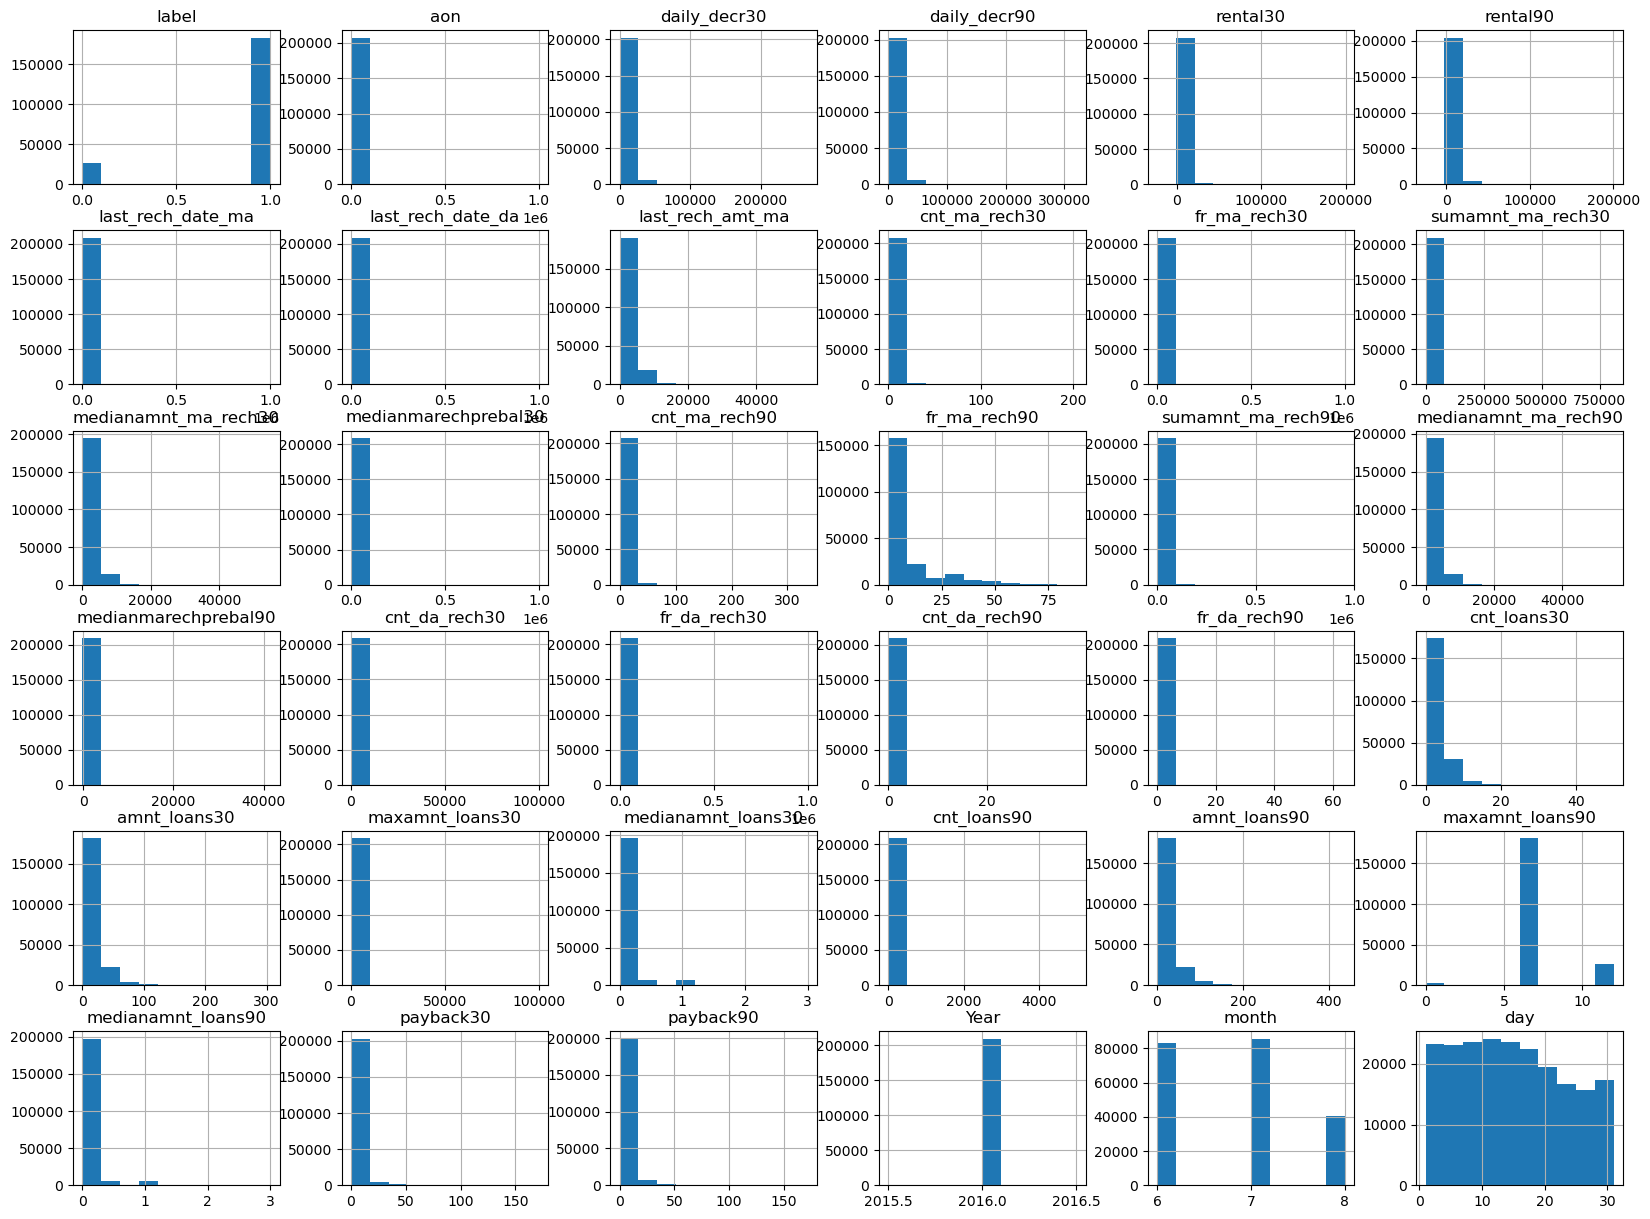

In [52]:
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
data.hist(ax=ax)
plt.show()

Ploting all columns by Histogram to check all data in a one place.

In [53]:
dx=data[['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90']]

In [54]:
dx.shape

(209593, 32)

# ZSCORE VALUE

In [55]:
from scipy.stats import zscore

In [56]:
z=np.abs(zscore(dx))
z

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0.103577,0.252299,0.276346,0.573844,0.558583,0.069637,0.069550,0.221637,0.464760,0.069279,...,0.297116,0.342470,0.063284,0.247794,0.073493,0.439950,0.334212,0.229594,2.904700,2.394093
1,0.097764,0.731037,0.553380,0.231788,0.036020,0.069303,0.069550,1.570178,0.699718,0.069670,...,0.688582,0.342470,0.061871,0.247794,0.077941,0.439950,2.517690,0.229594,0.385630,0.419233
2,0.100102,0.432011,0.429033,0.416020,0.447674,0.069619,0.069550,0.221637,0.699718,0.069670,...,0.688582,0.687700,0.063284,0.247794,0.077941,0.666624,0.334212,0.229594,0.385630,0.419233
3,0.103986,0.581326,0.555125,0.587935,0.576036,0.068914,0.069550,0.471344,0.934677,0.069670,...,0.297116,0.342470,0.063284,0.247794,0.073493,0.439950,0.334212,0.229594,0.385630,0.419233
4,0.094660,0.567293,0.543274,0.369886,0.413227,0.069600,0.069550,0.103151,0.710030,0.069633,...,1.660218,1.383682,0.063284,0.247794,0.051250,0.693417,0.334212,0.229594,0.120890,0.192873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,0.101833,0.567157,0.543159,0.372140,0.414910,0.069656,0.069550,0.836664,0.229802,0.069633,...,0.297116,0.342470,0.063284,0.247794,0.073493,0.439950,0.334212,0.229594,0.272170,0.322221
209589,0.092969,0.579622,0.553686,0.223791,0.304144,0.069600,0.069550,0.544737,0.005156,0.069652,...,0.094351,0.002761,0.063284,0.247794,0.069044,0.213277,0.334212,0.229594,0.272170,0.322221
209590,0.093788,0.700790,0.533194,0.735567,0.937500,0.069619,0.069550,0.221637,0.240114,0.069521,...,0.485818,1.383682,0.061871,0.247794,0.055699,1.146764,2.517690,0.229594,0.068209,0.047356
209591,0.084289,0.770755,0.594558,0.529352,0.433039,0.069637,0.068838,0.544737,0.240114,0.069596,...,0.297116,0.002761,0.061871,0.247794,0.069044,0.013396,2.517690,0.229594,0.385630,0.599385


Applying Zscore value to entire data for removing outliters form data.

In [57]:
threshold=3
print(np.where(z>3))

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64), array([14, 14, 31, ..., 27, 25, 29], dtype=int64))


Set Threshold point to data.

In [59]:
xd=dx[(z<3).all(axis=1)]
xd

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,...,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000
209589,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,...,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000
209590,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,...,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333
209591,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,...,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000


with the help of above mentioned function provide us all value that is below threshold point.

In [60]:
(209593-161465)

48128

In [61]:
(48128/209593)*100

22.962598941758554

Zscore functionality use to remove outliers but if we apply zscore value, so we are loosing  approx 23% of data but data is important so there are no need to apply Zscore functionality.

# Inter Quantile Range

In [62]:
q1=dx.quantile(0.25)
q1

aon                      246.000
daily_decr30              42.440
daily_decr90              42.692
rental30                 280.420
rental90                 300.260
last_rech_date_ma          1.000
last_rech_date_da          0.000
last_rech_amt_ma         770.000
cnt_ma_rech30              1.000
fr_ma_rech30               0.000
sumamnt_ma_rech30       1540.000
medianamnt_ma_rech30     770.000
medianmarechprebal30      11.000
cnt_ma_rech90              2.000
fr_ma_rech90               0.000
sumamnt_ma_rech90       2317.000
medianamnt_ma_rech90     773.000
medianmarechprebal90      14.600
cnt_da_rech30              0.000
fr_da_rech30               0.000
cnt_da_rech90              0.000
fr_da_rech90               0.000
cnt_loans30                1.000
amnt_loans30               6.000
maxamnt_loans30            6.000
medianamnt_loans30         0.000
cnt_loans90                1.000
amnt_loans90               6.000
maxamnt_loans90            6.000
medianamnt_loans90         0.000
payback30 

In Q1 all independent variable upto 25% quantile.

In [63]:
q3=dx.quantile(0.75)
q3

aon                       982.00
daily_decr30             7244.00
daily_decr90             7802.79
rental30                 3356.94
rental90                 4201.79
last_rech_date_ma           7.00
last_rech_date_da           0.00
last_rech_amt_ma         2309.00
cnt_ma_rech30               5.00
fr_ma_rech30                6.00
sumamnt_ma_rech30       10010.00
medianamnt_ma_rech30     1924.00
medianmarechprebal30       83.00
cnt_ma_rech90               8.00
fr_ma_rech90                8.00
sumamnt_ma_rech90       16000.00
medianamnt_ma_rech90     1924.00
medianmarechprebal90       79.31
cnt_da_rech30               0.00
fr_da_rech30                0.00
cnt_da_rech90               0.00
fr_da_rech90                0.00
cnt_loans30                 4.00
amnt_loans30               24.00
maxamnt_loans30             6.00
medianamnt_loans30          0.00
cnt_loans90                 5.00
amnt_loans90               30.00
maxamnt_loans90             6.00
medianamnt_loans90          0.00
payback30 

In Q3 all independent variable upto 75% quantile.

In [64]:
IQR=q3-q1
IQR

aon                       736.000
daily_decr30             7201.560
daily_decr90             7760.098
rental30                 3076.520
rental90                 3901.530
last_rech_date_ma           6.000
last_rech_date_da           0.000
last_rech_amt_ma         1539.000
cnt_ma_rech30               4.000
fr_ma_rech30                6.000
sumamnt_ma_rech30        8470.000
medianamnt_ma_rech30     1154.000
medianmarechprebal30       72.000
cnt_ma_rech90               6.000
fr_ma_rech90                8.000
sumamnt_ma_rech90       13683.000
medianamnt_ma_rech90     1151.000
medianmarechprebal90       64.710
cnt_da_rech30               0.000
fr_da_rech30                0.000
cnt_da_rech90               0.000
fr_da_rech90                0.000
cnt_loans30                 3.000
amnt_loans30               18.000
maxamnt_loans30             0.000
medianamnt_loans30          0.000
cnt_loans90                 4.000
amnt_loans90               24.000
maxamnt_loans90             0.000
medianamnt_loa

Q3-Q1

In [65]:
print((dx<(q1-(1.5*IQR)))|(dx>(q3+(1.5*IQR))))

          aon  daily_decr30  daily_decr90  rental30  rental90  \
0       False         False         False     False     False   
1       False         False         False     False     False   
2       False         False         False     False     False   
3       False         False         False     False     False   
4       False         False         False     False     False   
...       ...           ...           ...       ...       ...   
209588  False         False         False     False     False   
209589  False         False         False     False     False   
209590  False         False         False     False     False   
209591  False         False         False     False     False   
209592  False         False         False     False     False   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                   False              False             False          False   
1                    True              False             

with the help of threshold function provide us all value that is below threshold point.

In [66]:
x_new=dx[(z<3).all(axis=1)]
x_new

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,...,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000
209589,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,...,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000
209590,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,...,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333
209591,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,...,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000


With the help of above mentioned function provide us all value that is below threshold point.

In [67]:
(48128/209593)*100

22.962598941758554

IQR functionality use to remove outliers but if we apply IQR, so we are loosing  approx 23% of data but data is important so there are no need to apply this functionality.

In [68]:
x=data[['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90', 'Year' , 'month', 'day']]

In [69]:
y=data['label']

In [70]:
# checking shape Independent Variable.
x.shape

(209593, 35)

In [71]:
#checking shape target Variable.
y.shape

(209593,)

In [72]:
x.head()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Year,month,day
0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,...,0.0,2.0,12,6,0.0,29.000000,29.000000,2016,7,20
1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,...,0.0,1.0,12,12,0.0,0.000000,0.000000,2016,8,10
2,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,...,0.0,1.0,6,6,0.0,0.000000,0.000000,2016,8,19
3,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,...,0.0,2.0,12,6,0.0,0.000000,0.000000,2016,6,6
4,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,...,0.0,7.0,42,6,0.0,2.333333,2.333333,2016,6,22


In [73]:
#Importing LabelEncoder.
from sklearn.preprocessing import LabelEncoder

In [74]:
le=LabelEncoder()
x['Year']=le.fit_transform(x['Year'])

Apply labelencoder on Year column.

# Data Scaling

In [75]:
#Importing standard scaler.
from sklearn.preprocessing import StandardScaler

In [76]:
#Importing MinMaxScaler.
from sklearn.preprocessing import MinMaxScaler

In [77]:
#Importing Robustscaler.
from sklearn.preprocessing import RobustScaler

In [78]:
scaler = RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'Year', 'month', 'day'])

In [79]:
#checking shape after applying Scaler.
x.shape

(209593, 35)

In [80]:
scaler = StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'Year', 'month', 'day'])

In [81]:
#checking all the data after scaling.
standard_df.head()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Year,month,day
0,-0.103577,-0.252299,-0.276346,-0.573844,-0.558583,-0.069637,-0.06955,-0.221637,-0.464760,-0.069279,...,-0.247794,-0.073493,-0.439950,-0.334212,-0.229594,2.90470,2.394093,0.0,0.273360,0.663721
1,-0.097764,0.731037,0.553380,0.231788,0.036020,-0.069303,-0.06955,1.570178,-0.699718,-0.069670,...,-0.247794,-0.077941,-0.439950,2.517690,-0.229594,-0.38563,-0.419233,0.0,1.622099,-0.521271
2,-0.100102,-0.432011,-0.429033,-0.416020,-0.447674,-0.069619,-0.06955,-0.221637,-0.699718,-0.069670,...,-0.247794,-0.077941,-0.666624,-0.334212,-0.229594,-0.38563,-0.419233,0.0,1.622099,0.545222
3,-0.103986,-0.581326,-0.555125,-0.587935,-0.576036,-0.068914,-0.06955,-0.471344,-0.934677,-0.069670,...,-0.247794,-0.073493,-0.439950,-0.334212,-0.229594,-0.38563,-0.419233,0.0,-1.075378,-0.995267
4,-0.094660,-0.567293,-0.543274,-0.369886,-0.413227,-0.069600,-0.06955,0.103151,0.710030,-0.069633,...,-0.247794,-0.051250,0.693417,-0.334212,-0.229594,-0.12089,-0.192873,0.0,-1.075378,0.900719


In [82]:
x=standard_df

# Principal Component Analysis

In [83]:
from sklearn.decomposition import PCA
testpca=PCA()
Y=testpca.fit(x)

Importing PCA and fit into Y variable.

In [84]:
Y.explained_variance_ratio_

array([2.07421318e-01, 9.42046839e-02, 6.16757414e-02, 5.55888540e-02,
       5.11189943e-02, 4.06086374e-02, 3.38914679e-02, 2.97729115e-02,
       2.96317137e-02, 2.95182072e-02, 2.94882708e-02, 2.94206659e-02,
       2.92878125e-02, 2.92572858e-02, 2.92018734e-02, 2.91982439e-02,
       2.89738821e-02, 2.79233283e-02, 2.60778036e-02, 2.40019002e-02,
       1.91149324e-02, 1.70363363e-02, 1.31551679e-02, 7.28388713e-03,
       5.94280415e-03, 5.28933004e-03, 4.79536378e-03, 3.91932441e-03,
       2.55056479e-03, 1.72973790e-03, 1.19943910e-03, 6.93354990e-04,
       5.96094332e-04, 4.30067375e-04, 9.98149916e-34])

In [85]:
var_cumu=np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 20.74213176,  30.16260015,  36.33017428,  41.88905968,
        47.00095911,  51.06182285,  54.45096964,  57.42826079,
        60.39143216,  63.34325288,  66.29207996,  69.23414655,
        72.16292779,  75.08865637,  78.00884371,  80.92866811,
        83.82605632,  86.61838915,  89.22616951,  91.62635953,
        93.53785278,  95.24148641,  96.5570032 ,  97.28539191,
        97.87967233,  98.40860533,  98.88814171,  99.28007415,
        99.53513063,  99.70810442,  99.82804833,  99.89738383,
        99.95699326, 100.        , 100.        ])

In [86]:
FinalPCA=PCA(n_components=24)
FinalData=FinalPCA.fit_transform(x)

Reduce column from 35 to 24 but approx 97% data available is here.

In [87]:
FinalData2=pd.DataFrame(FinalData)
FinalData2

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-1.334129,-0.150561,1.817150,-1.714070,3.003549,-0.312247,-0.305744,0.086435,0.070264,-0.082843,...,-0.107292,0.044172,-0.329774,-0.097887,0.540027,0.660808,-0.079618,-0.329979,0.101629,0.153375
1,0.749702,3.278277,0.438579,-0.374677,-1.085670,-0.537054,-1.205651,0.076759,0.107126,-0.075740,...,-0.179055,0.016696,-0.341703,-1.088691,0.895532,-2.127133,-0.097890,-0.435547,0.639822,-0.016589
2,-1.657314,0.210603,0.291808,-0.169667,-0.950747,-0.223056,-0.443211,0.058071,0.095588,-0.107600,...,0.049013,-0.068099,0.153848,-0.654885,0.128867,0.090832,0.017060,-1.317607,0.969036,0.747642
3,-2.294636,-0.765475,-0.497066,-0.043810,-0.616243,-0.257991,-0.505385,0.019952,0.097056,-0.110959,...,0.063713,-0.067487,0.175490,-0.152490,-0.445585,-0.488911,-0.019377,0.389313,-0.918897,-0.244196
4,1.294409,-0.826686,-2.230783,-0.049920,1.235692,0.469273,0.919237,0.069154,0.040038,-0.080619,...,-0.017290,-0.035670,-0.035619,-0.119033,-0.470952,-0.543468,-0.040234,0.005335,-0.214129,0.794072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,-0.953607,1.074918,-1.350460,-0.336756,0.270599,0.186491,0.475357,0.050630,0.073601,-0.102073,...,0.053437,-0.075781,0.180029,-0.441398,-0.523699,-0.333811,-0.044088,0.203759,-0.060360,-0.144291
209589,-1.215961,-1.092422,-0.691956,-0.044941,-0.220137,0.048908,0.242848,0.024290,0.075560,-0.130163,...,0.136709,-0.097130,0.315343,0.049275,-0.290666,-0.261491,-0.042072,0.409777,-0.335501,-0.276525
209590,2.483207,-0.796216,0.514376,-0.069982,-0.277403,0.489889,1.008074,0.175462,0.021884,-0.060094,...,-0.276897,0.039096,-0.556733,-1.305736,1.969445,-1.124065,-0.234998,0.071028,0.186291,0.062569
209591,0.905326,-0.052843,0.242781,-0.111260,-0.062721,1.614648,-1.058809,0.115202,0.097701,-0.151714,...,-0.131503,-0.052078,-0.187865,-1.817843,2.135459,-0.128862,1.570395,0.782958,0.510895,0.313730


In [88]:
X=FinalData2

In [89]:
dy=y

In [90]:
dx=X

# Class Imbalance 

In [91]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over, y_over=SM.fit_resample(dx,dy)

In [92]:
y_over.shape

(366862,)

In [93]:
x_over.shape

(366862, 24)

In [94]:
y=pd.DataFrame(y_over)
y

,label
0,0
1,1
2,1
3,1
4,1
...,...
366857,0
366858,0
366859,0
366860,0


<AxesSubplot:ylabel='count'>

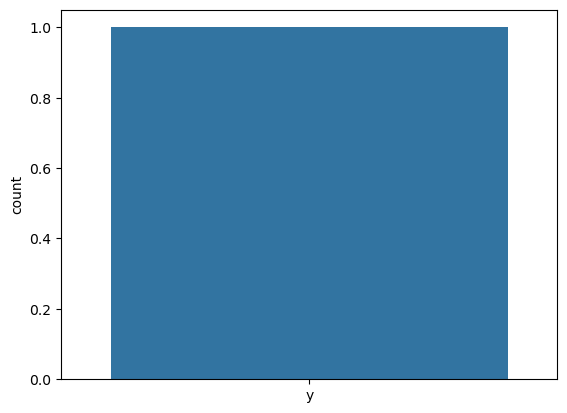

In [95]:
sns.countplot(['y'])

In [96]:
X=x_over

In [97]:
X.shape

(366862, 24)

In [98]:
y.shape

(366862, 1)

# Spliting the all data into X and y for model building

In [99]:
X_train , X_test  ,y_train , y_test=train_test_split(X, y, test_size=0.3, random_state=42)

Train Test Split fucntionality for split all data into x and y.

In [100]:
X_train.shape

(256803, 24)

In [102]:
X_test.shape

(110059, 24)

In [103]:
y_train.shape

(256803, 1)

In [104]:
y_test.shape

(110059, 1)

# Model Building

# Decision Tree Classifier

In [105]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy',splitter='best', max_depth=None)
dtc.fit(X_train,y_train)
preddtc=dtc.predict(X_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8612380632206362
[[48716  6325]
 [ 8947 46071]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86     55041
           1       0.88      0.84      0.86     55018

    accuracy                           0.86    110059
   macro avg       0.86      0.86      0.86    110059
weighted avg       0.86      0.86      0.86    110059



Decision Tree Classifier Algorithm performing very good and the score is 86%

# KNeighborsClassifier

In [106]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
predknn=knn.predict(X_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8796463714916545
[[53690  1351]
 [11895 43123]]
              precision    recall  f1-score   support

           0       0.82      0.98      0.89     55041
           1       0.97      0.78      0.87     55018

    accuracy                           0.88    110059
   macro avg       0.89      0.88      0.88    110059
weighted avg       0.89      0.88      0.88    110059



KNeighborsClassifier Algorithm performing very good and the score is 87%

In [107]:
#Importing AdaBoostClassifier and RandomForestClassifer for scikit learn.
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier

In [108]:
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)
predrf=rf.predict(X_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9172807312441509
[[51810  3231]
 [ 5873 49145]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     55041
           1       0.94      0.89      0.92     55018

    accuracy                           0.92    110059
   macro avg       0.92      0.92      0.92    110059
weighted avg       0.92      0.92      0.92    110059



RandomForestClassifier Algorithm performing very good and the score is 91%

# AdaBoost Classifier

In [109]:
ad=AdaBoostClassifier()
ad.fit(X_train,y_train) 
predad=ad.predict(X_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.7769287382222263
[[43928 11113]
 [13438 41580]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.78     55041
           1       0.79      0.76      0.77     55018

    accuracy                           0.78    110059
   macro avg       0.78      0.78      0.78    110059
weighted avg       0.78      0.78      0.78    110059



AdaBoost Classifier Algorithm performing very good and the score is 78%

# Cross Validation

As we know after deployment all algorithms they are performing very well but there may be Overfiting and Underfiting case. Remove Overfiting and UnderFiting we have to cross validate all algorithms.

In [110]:
#Importing Cross Val Score form scikit learn.
from sklearn.model_selection import cross_val_score

In [111]:
dtc=cross_val_score(dtc,X,y,cv=5)
print("Cross Validation Score of DTC:",dtc.mean())

Cross Validation Score of DTC: 0.8716002197947764


After apply Cross validation on DTC, the model is scoring 87%.

In [112]:
knn=cross_val_score(knn,X,y,cv=5)
print("Cross Validation Score of KNN:",knn.mean())

Cross Validation Score of KNN: 0.8875380973056488


After apply Cross validation on KNN, the model is scoring 88%.

In [113]:
rf=cross_val_score(rf,X,y,cv=5)
print("Cross Validation Score of rf:",rf.mean())

Cross Validation Score of rf: 0.9249881419860128


After apply Cross validation on RandomForest, the model is scoring 92%

In [114]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad=cross_val_score(ad,X,y,cv=5)
print("Cross Validation Score of AdaBoostClassifier:",ad.mean())

Cross Validation Score of AdaBoostClassifier: 0.7801407781509565


After apply Cross validation on AdaBoost, the model is scoring 78%

# Hyper parameter tuning

In [115]:
#Import GridSearchCV from scikit learn.
from sklearn.model_selection import GridSearchCV

In [116]:
from sklearn import datasets
rf = RandomForestClassifier()
grid_parameters = {'criterion':['gini','entropy']}
grid_sr = GridSearchCV(estimator=rf,param_grid=grid_parameters,scoring='accuracy', cv=5)
grid_sr.fit(X_train, y_train)
best_parameters=grid_sr.best_params_
best_result=grid_sr.best_score_
print(best_result)

0.9099348488049378


After apply Hyper Parameter Tuning on RF, the model is scoring 90%

# ROC_AUC_CURVE

In [117]:
#Import ROC_Curve.
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [118]:
#Import ROC_AUC_SCORE.
from sklearn.metrics import roc_auc_score

In [121]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)
y_pred_prob=rf.predict_proba(X_test)[:,1]
y_pred_prob

array([0.04, 0.77, 0.81, ..., 0.89, 1.  , 0.45])

In [122]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)


In [123]:
fpr

array([0.00000000e+00, 0.00000000e+00, 1.81682746e-05, 7.26730982e-05,
       1.81682746e-04, 1.81682746e-04, 3.08860668e-04, 3.99702040e-04,
       5.63216511e-04, 5.63216511e-04, 7.63067531e-04, 9.26582003e-04,
       9.26582003e-04, 1.18093785e-03, 1.18093785e-03, 1.50796679e-03,
       1.50796679e-03, 1.78049091e-03, 2.08935157e-03, 2.08935157e-03,
       2.43454879e-03, 2.43454879e-03, 2.43454879e-03, 2.81608256e-03,
       2.81608256e-03, 3.45197217e-03, 4.05152523e-03, 4.05152523e-03,
       4.61474174e-03, 4.61474174e-03, 5.26879962e-03, 5.26879962e-03,
       5.81384786e-03, 5.81384786e-03, 6.52241057e-03, 6.52241057e-03,
       7.33998292e-03, 7.33998292e-03, 8.15755528e-03, 8.15755528e-03,
       9.04780073e-03, 1.00652241e-02, 1.00652241e-02, 1.10463109e-02,
       1.10463109e-02, 1.21909122e-02, 1.21909122e-02, 1.34263549e-02,
       1.34263549e-02, 1.47163024e-02, 1.59154085e-02, 1.74415436e-02,
       1.87314911e-02, 1.87314911e-02, 2.01122799e-02, 2.16929198e-02,
      

In [124]:
tpr

array([0.        , 0.10278454, 0.16698172, 0.21725617, 0.26236868,
       0.26238686, 0.30253735, 0.33870733, 0.37282344, 0.37284162,
       0.40519466, 0.43480316, 0.43482133, 0.46110364, 0.46112181,
       0.48569559, 0.48575012, 0.51023301, 0.53320731, 0.53322549,
       0.5538551 , 0.55389145, 0.55390963, 0.57292159, 0.57297612,
       0.59218801, 0.61003672, 0.61005489, 0.62728562, 0.62732197,
       0.64333491, 0.64337126, 0.65836635, 0.6584027 , 0.67207096,
       0.67208913, 0.68526664, 0.68530299, 0.697499  , 0.69751718,
       0.7106038 , 0.72267258, 0.72269076, 0.73337817, 0.73339634,
       0.74441092, 0.7444291 , 0.75480752, 0.75484387, 0.76400451,
       0.77351049, 0.78221673, 0.79030499, 0.79034134, 0.79837508,
       0.80602712, 0.81391545, 0.81393362, 0.82091316, 0.82752917,
       0.8338362 , 0.83972518, 0.84554146, 0.85113963, 0.85657421,
       0.85659239, 0.86217238, 0.86219056, 0.86738885, 0.86738885,
       0.87215093, 0.87215093, 0.87667672, 0.88100258, 0.88100

In [125]:
thresholds

array([2.        , 1.        , 0.99      , 0.98      , 0.97      ,
       0.965     , 0.96      , 0.95      , 0.94      , 0.935     ,
       0.93      , 0.92      , 0.91333333, 0.91      , 0.90666667,
       0.9       , 0.895     , 0.89      , 0.88      , 0.87666667,
       0.87      , 0.865     , 0.86333333, 0.86      , 0.85028571,
       0.85      , 0.84      , 0.835     , 0.83      , 0.825     ,
       0.82      , 0.814     , 0.81      , 0.8075    , 0.8       ,
       0.795     , 0.79      , 0.785     , 0.78      , 0.77333333,
       0.77      , 0.76      , 0.755     , 0.75      , 0.7425    ,
       0.74      , 0.735     , 0.73      , 0.725     , 0.72      ,
       0.71      , 0.7       , 0.69      , 0.6825    , 0.68      ,
       0.67      , 0.66      , 0.65666667, 0.65      , 0.64      ,
       0.63      , 0.62      , 0.61      , 0.6       , 0.59      ,
       0.585     , 0.58      , 0.575     , 0.57      , 0.566     ,
       0.56      , 0.555     , 0.55      , 0.54      , 0.5325 

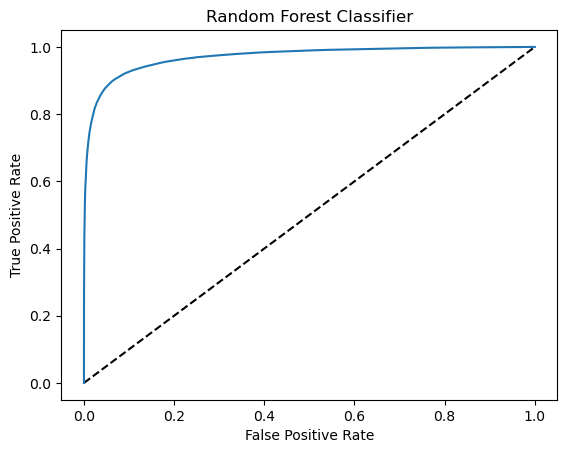

In [126]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

In [127]:
auc_score=roc_auc_score(y_test,rf.predict(X_test))
print(auc_score)

0.91727571103082


# Metric

In [128]:
from sklearn import metrics

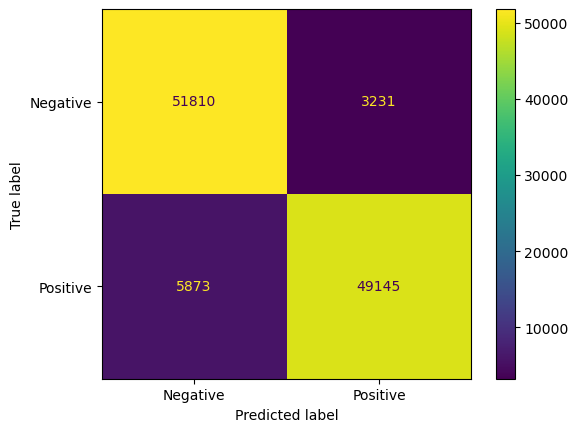

In [129]:
metrics.plot_confusion_matrix(rf, X_test, y_test, display_labels=['Negative', 'Positive'])

In [131]:
import joblib
joblib.dump(rf,'Micro_credit_defaulter_project_23.obj')

['Micro_credit_defaulter_project_23.obj']